In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [245]:
db = pd.read_csv('laptop_data.csv', index_col=[0])
db.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [246]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [247]:
db.duplicated().sum()

29

In [248]:
db.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [249]:
db['Ram'] = db['Ram'].str.replace('GB','')
db['Weight'] = db['Weight'].str.replace('kg','')
db['Ram'] = db['Ram'].astype('int32')
db['Weight'] = db['Weight'].astype('float32')

In [250]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 112.0+ KB


/tmp/ipykernel_31262/1920286819.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(db['Price'])


<Axes: xlabel='Price', ylabel='Density'>

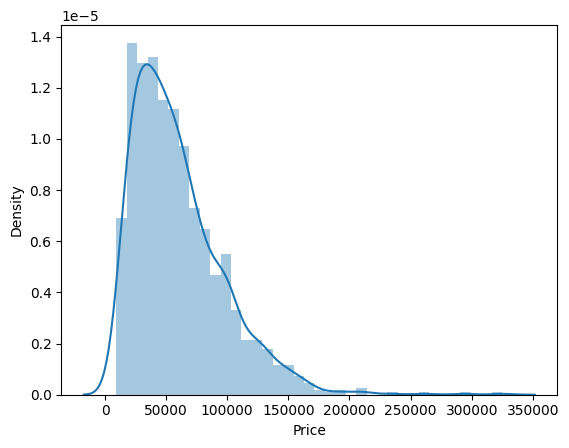

In [251]:
sns.distplot(db['Price'])

<Axes: xlabel='Company'>

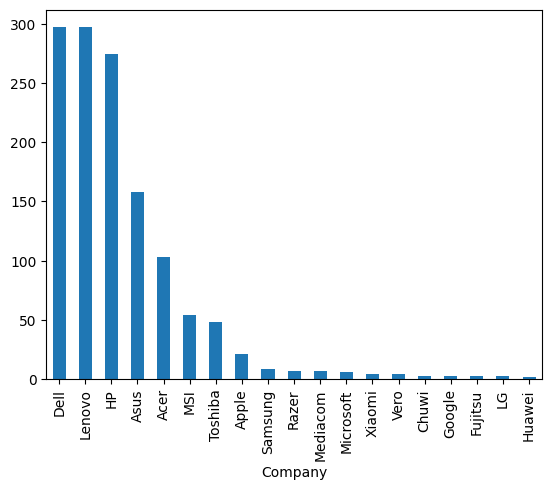

In [252]:
db['Company'].value_counts().plot(kind='bar')

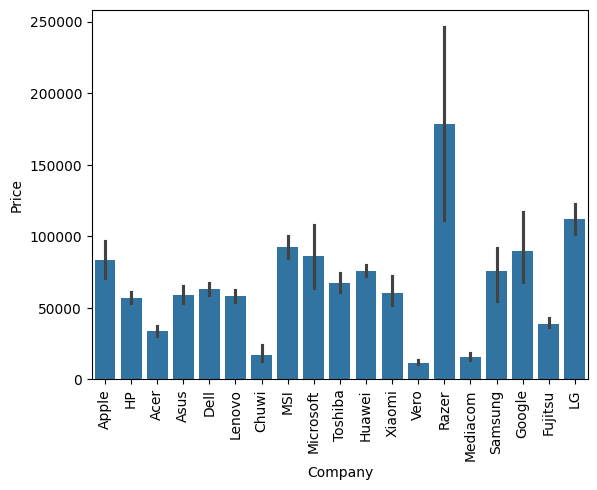

In [253]:
sns.barplot(x=db['Company'], y=db['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

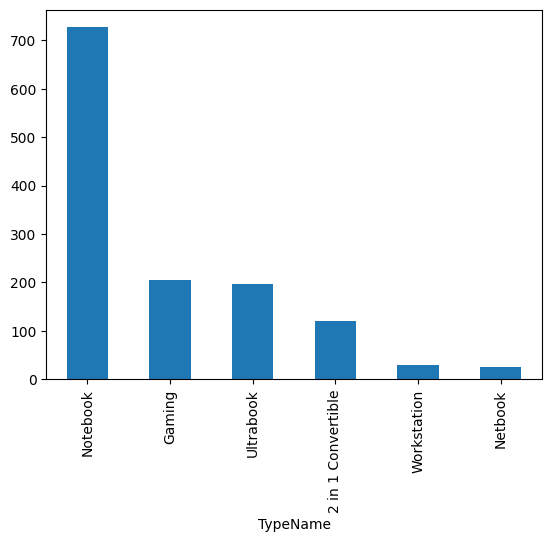

In [254]:
db['TypeName'].value_counts().plot(kind='bar')

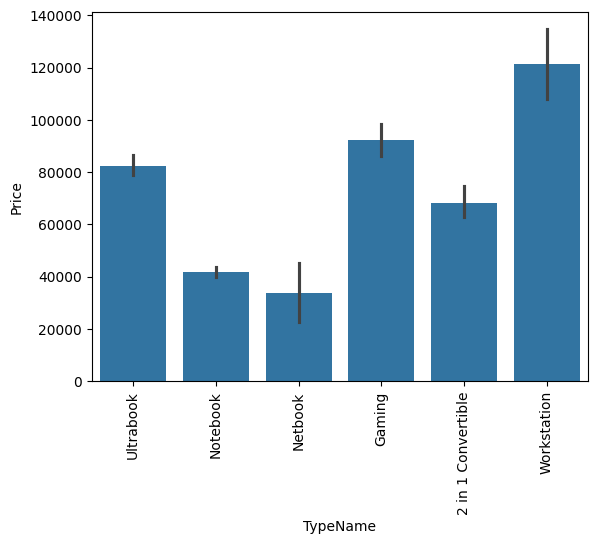

In [255]:
sns.barplot(x=db['TypeName'], y=db['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_31262/2423969236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(db['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

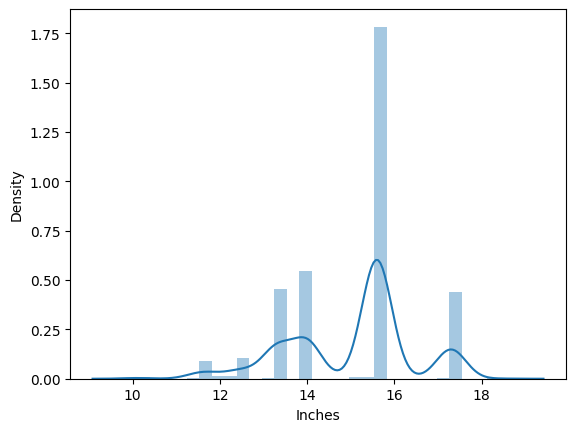

In [256]:
sns.distplot(db['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

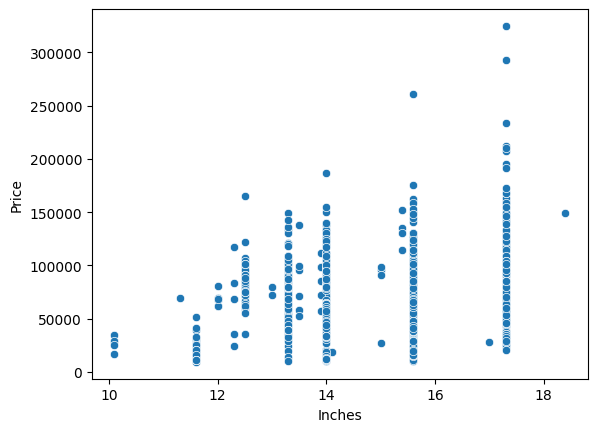

In [257]:
sns.scatterplot(x=db['Inches'],y=db['Price'])

In [258]:
db['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [259]:
db['Touchscreen'] = db['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
db['IPS'] = db['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

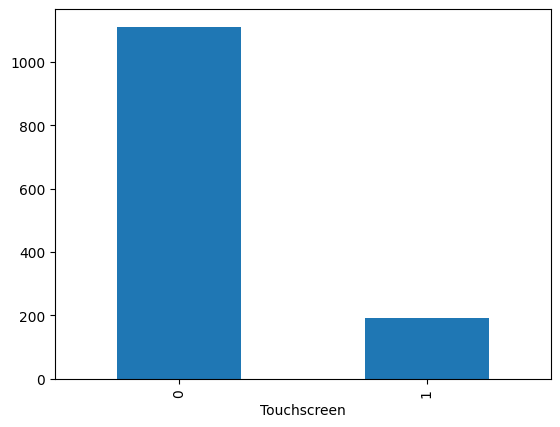

In [260]:
db['Touchscreen'].value_counts().plot(kind='bar')
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Touchscreen', ylabel='Price'>

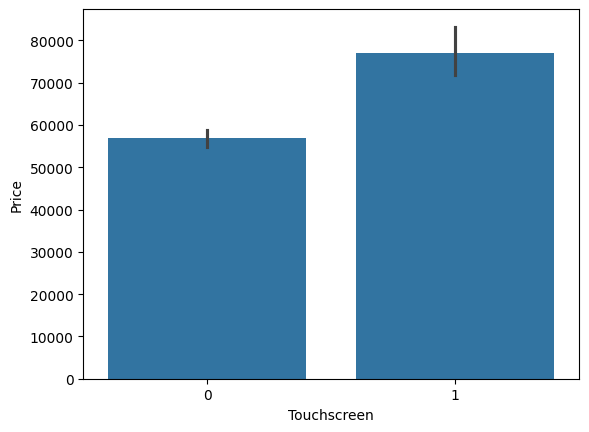

In [261]:
sns.barplot(x=db['Touchscreen'], y=db['Price'])

<Axes: xlabel='IPS'>

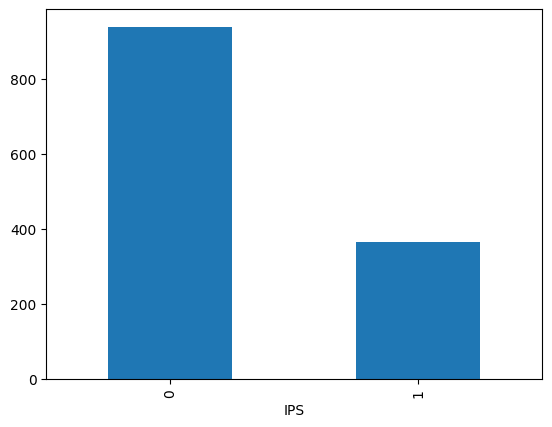

In [262]:
db['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

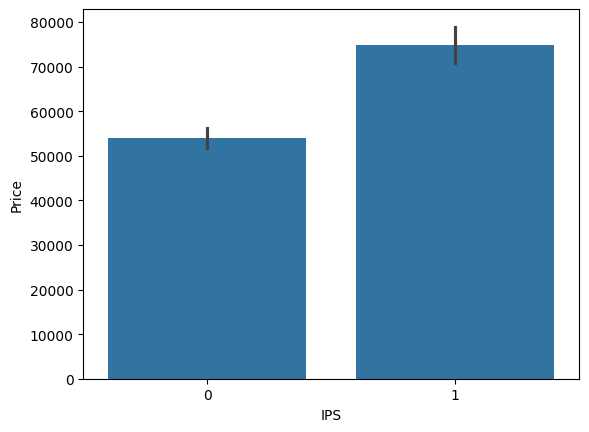

In [263]:
sns.barplot(x=db['IPS'], y=db['Price'])

In [264]:
temp = db['ScreenResolution'].str.split('x', n=1, expand=True)
db['X_res'] = temp[0]
db['Y_res'] = temp[1]
db.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [265]:
db['X_res'] = db['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
db.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [266]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 152.7+ KB


In [267]:
db['X_res'] = db['X_res'].astype('int')
db['Y_res'] = db['Y_res'].astype('int')

In [268]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 152.7+ KB


In [269]:
db['PPI'] = ((db['X_res']**2) + (db['Y_res']**2))**0.5/db['Inches'].astype('float')
# PPI - Pixels Per Inches

In [270]:
db.drop(columns=[ 'Inches', 'X_res', 'Y_res'], inplace=True)

In [271]:
db.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [272]:
db['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [273]:
db['CPU Name'] = db['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
db.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [274]:
def get_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [275]:
db['CPU'] = db['CPU Name'].apply(get_processor)
db.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,CPU
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU'>

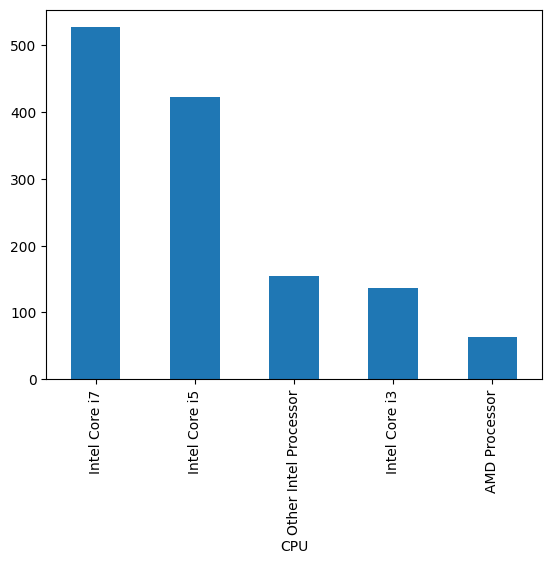

In [276]:
db['CPU'].value_counts().plot(kind='bar')

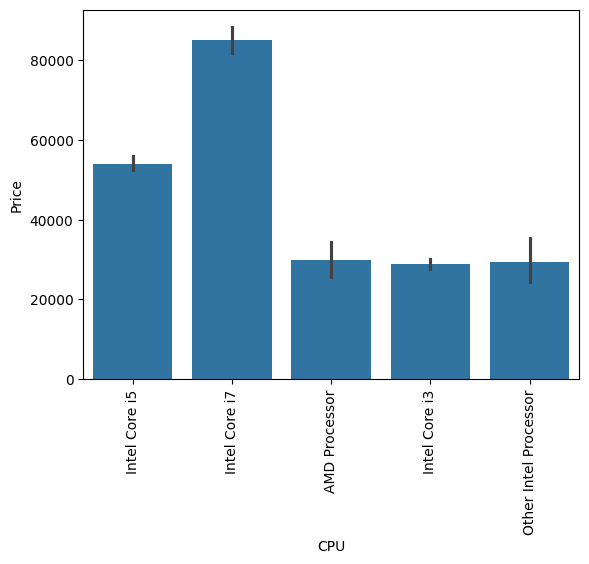

In [277]:
sns.barplot(x=db['CPU'], y = db['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [278]:
db.drop(columns=['Cpu', 'CPU Name'], inplace=True)

In [279]:
db.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

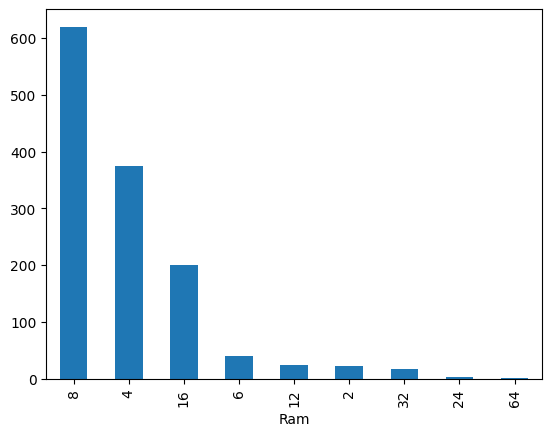

In [280]:
db['Ram'].value_counts().plot(kind='bar')

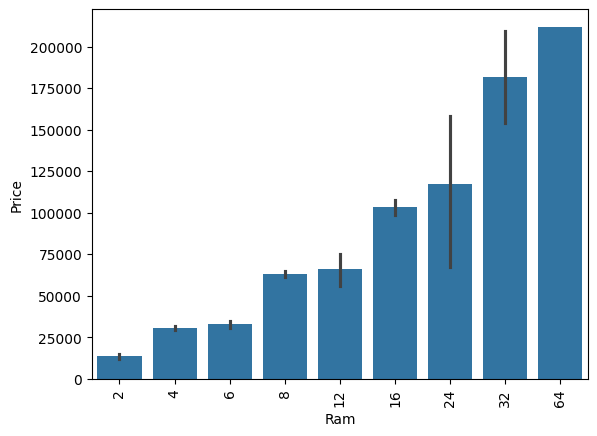

In [281]:
sns.barplot(x=db['Ram'], y = db['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [282]:
db['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [283]:
db['Memory'] = db['Memory'].astype(str).replace('\.0', '', regex=True)
db["Memory"] = db["Memory"].str.replace('GB', '')
db["Memory"] = db["Memory"].str.replace('TB', '000')
new = db["Memory"].str.split("+", n = 1, expand = True)

db["first"]= new[0]
db["first"]=db["first"].str.strip()

db["second"]= new[1]

db["Layer1HDD"] = db["first"].apply(lambda x: 1 if "HDD" in x else 0)
db["Layer1SSD"] = db["first"].apply(lambda x: 1 if "SSD" in x else 0)
db["Layer1Hybrid"] = db["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
db["Layer1Flash_Storage"] = db["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

db['first'] = db['first'].str.replace(r'\D', '')

db["second"].fillna("0", inplace = True)

db["Layer2HDD"] = db["second"].apply(lambda x: 1 if "HDD" in x else 0)
db["Layer2SSD"] = db["second"].apply(lambda x: 1 if "SSD" in x else 0)
db["Layer2Hybrid"] = db["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
db["Layer2Flash_Storage"] = db["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

db['second'] = db['second'].str.replace(r'\D', '')

# db["first"] = db["first"].astype(int)
# db["second"] = db["second"].astype(int)
db["first"] = db["first"].str.extract('(\d+)', expand=False).astype(float)
db["second"] = db["second"].str.extract('(\d+)', expand=False).astype(float)


db["HDD"]=(db["first"]*db["Layer1HDD"]+db["second"]*db["Layer2HDD"])
db["SSD"]=(db["first"]*db["Layer1SSD"]+db["second"]*db["Layer2SSD"])
db["Hybrid"]=(db["first"]*db["Layer1Hybrid"]+db["second"]*db["Layer2Hybrid"])
db["Flash_Storage"]=(db["first"]*db["Layer1Flash_Storage"]+db["second"]*db["Layer2Flash_Storage"])

db.drop(columns=['Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [284]:
db.drop(columns=['first', 'second'],inplace=True
)

In [285]:
db.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0


In [286]:
db.drop(columns=['Memory'], inplace=True)

In [287]:
db.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0


In [288]:
t1 = db.select_dtypes(include=['float64','int64']).columns
db[t1].corr()['Price']

Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [289]:
db.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [290]:
db.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0


In [291]:
db['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [292]:
db['GPU'] = db['Gpu'].apply(lambda x:x.split()[0])
db.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


In [293]:
db['GPU'].value_counts()

GPU
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [294]:
db = db[db['GPU']!= 'ARM']

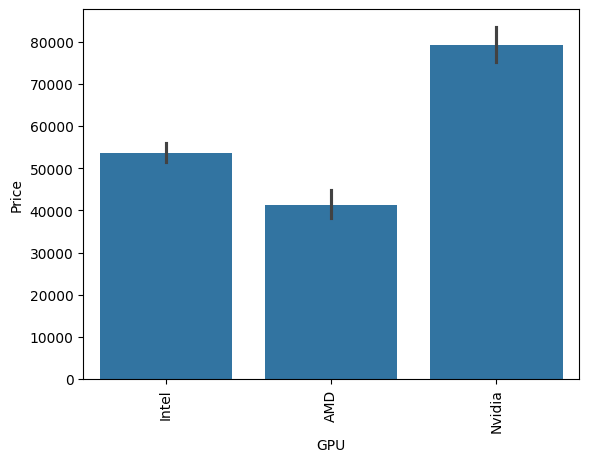

In [295]:
sns.barplot(x=db['GPU'], y = db['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [296]:
db.drop(columns=['Gpu'], inplace=True)


In [297]:
db.head()

,Company,TypeName,ScreenResolution,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,1440x900,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,Full HD 1920x1080,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


In [298]:
db['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

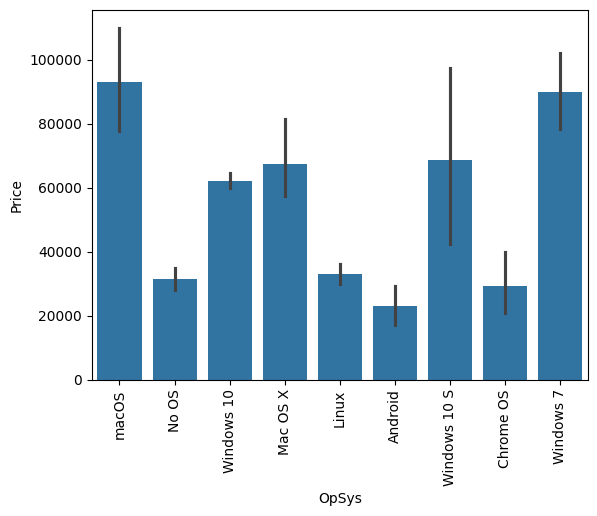

In [299]:
sns.barplot(x=db['OpSys'], y = db['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [300]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [301]:
db['os'] = db['OpSys'].apply(cat_os)

In [302]:
db.head()

,Company,TypeName,ScreenResolution,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU,os
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,1440x900,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,Full HD 1920x1080,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [303]:
db.drop(columns=['OpSys'], inplace=True)

/tmp/ipykernel_31262/3647036929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(db['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

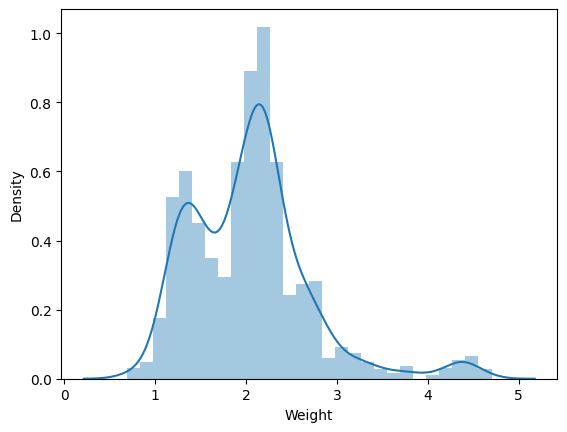

In [304]:
sns.distplot(db['Weight'])


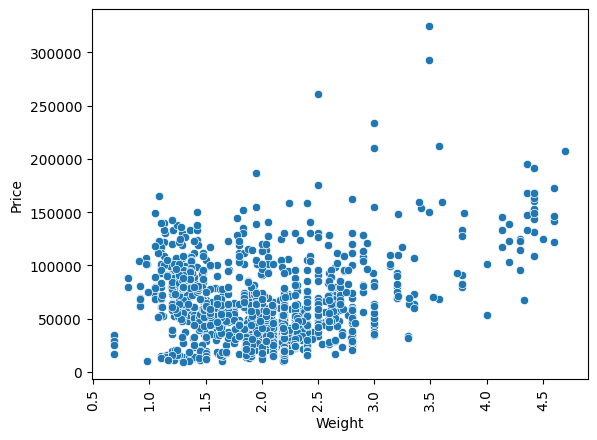

In [305]:
sns.scatterplot(x=db['Weight'], y = db['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

/tmp/ipykernel_31262/2457029482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(db['Price']))


<Axes: xlabel='Price', ylabel='Density'>

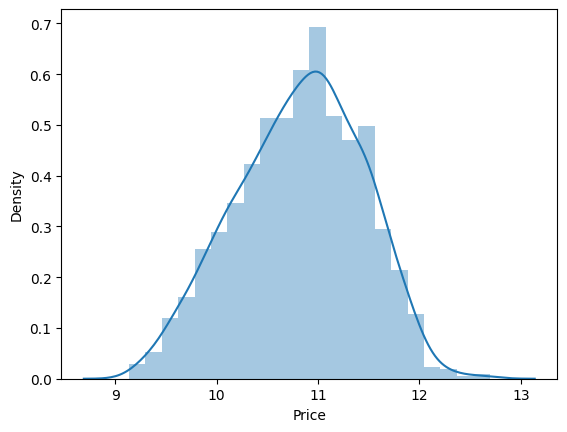

In [306]:
sns.distplot(np.log(db['Price']))

In [307]:
db.drop(columns=['ScreenResolution'], inplace=True)

In [308]:
X = db.drop(columns=['Price'])
y = np.log(db['Price'])

In [309]:
X


,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000.0,0.0,AMD,Windows


In [310]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [312]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0.0,128.0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000.0,128.0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0.0,0.0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000.0,0.0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000.0,128.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0.0,512.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000.0,0.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000.0,0.0,Nvidia,Others/No OS/Linux


In [313]:
db.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [314]:
db.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [329]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [331]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   PPI          1302 non-null   float64
 8   CPU          1302 non-null   object 
 9   HDD          1302 non-null   float64
 10  SSD          1302 non-null   float64
 11  GPU          1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(4), int32(1), int64(2), object(5)
memory usage: 132.2+ KB


#### Linear Regression

In [332]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418629
MAE 0.2101782797642888


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Ridge Regression

In [333]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = Ridge(alpha=10)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582968


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Lasso Regression

In [334]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = Lasso(alpha=0.001)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### KNN

In [335]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8017673664034364
MAE 0.19346118183798544


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Decision Tree

In [352]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8490278152286554
MAE 0.17806239762899626


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### SVM

In [337]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8083180902272435
MAE 0.20239059427315706


#### Random Forest

In [349]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8873402378382488
MAE 0.15860130110457718


#### ExtraTrees

In [339]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=None, max_features=0.75, max_depth=15)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8753793123440623
MAE 0.15979519126758127


#### AdaBoost

In [340]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7993669164814797
MAE 0.22865209116988708


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Gradient Boost

In [341]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8815494720461726
MAE 0.15976646933635477


#### XgBoost

In [342]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Voting Regressor

In [343]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, max_depth=5, learning_rate=0.3)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=None, max_features=0.75, max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5,1,1,1])
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8896985885210311
MAE 0.15757969174688158


#### Stacking

In [344]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse = False, drop='first'),[0,1,7,10,11])], remainder='passthrough')
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, max_depth=5, learning_rate=0.3)

step2 = StackingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb)], final_estimator=Ridge(alpha=100))
pipe = Pipeline([('step1', step1),('step2', step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8783737553727202
MAE 0.16721362026878744


### Exporting Model

In [351]:
import pickle
pickle.dump(db, open('db.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [350]:
db

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU,HDD,SSD,GPU,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000.0,0.0,AMD,Windows
